In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import os
import re
import pprint

In [2]:
data = json.loads(os.environ['EXP_DATA'])
history = data['history']



# Model and Benchmark Summary

In [3]:
for s in data["description"].split(".")[:-1]:
    print(s + ".\n")

Trained DenseNet121_CheXpert architecture using predefined benchmark.

The benchmark was initialized for the chexpert_full dataset with batch size of 128, shuffel set to True and images rescaled to dimension (256, 256).


The training was done for 10 epochs using the Adam optimizer and binary_crossentropy loss.


A total of 14 labels/pathologies were included in the training and encoded using the 'uzeroes' method.


The traing set included 144408 number of sample, the validation set 35074, and the test set 43932.



## Extract and format metrics to be plotted

In [4]:
# if there are any metrics that were renamed, add this new name here as ("default_name":"new_name")
metric_custom_names={"auc":"AUC_ROC"}

metric_names = [re.sub("([a-z0-9])([A-Z])","\g<1> \g<2>",name) for name in data["benchmark"]["metrics"]]
metric_keys = [re.sub("([a-z0-9])([A-Z])","\g<1>_\g<2>",name).lower() for name in data["benchmark"]["metrics"]]

for default_name, custom_name in metric_custom_names.items():
    if not default_name in history.keys() and default_name in metric_keys:
        #replace default name with custom name
        metric_keys[metric_keys.index(default_name)]=custom_name


## Plot training & validation accuracy values

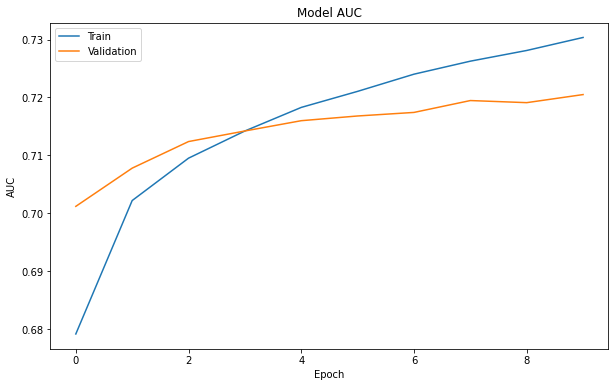

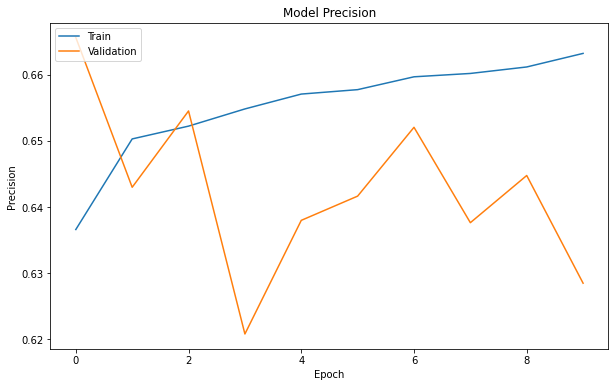

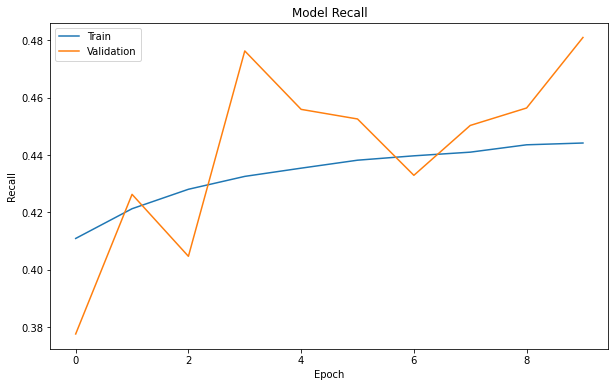

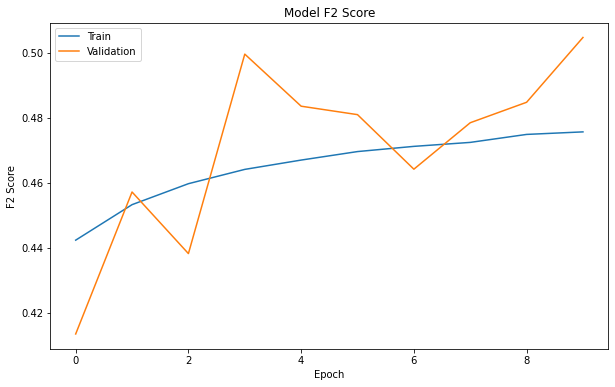

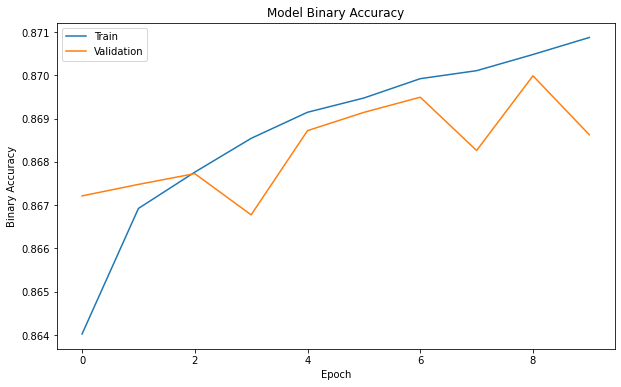

In [5]:
def print_or_plot_metric(metric_key, metric_name, figure_name):
    if len(history[metric_key]) == 1:
        print("Data for {m_name} only available for a single epoch. \nSkipping plot and printing data...".format(m_name=metric_name))
        print('Train {}: '.format(metric_name), history[metric_key])
        print('Validation {}: '.format(metric_name), history['val_'+metric_key])
        print()        
    else:
        plot_epoch_metric(metric_key, metric_name, figure_name)
        
def plot_epoch_metric(metric_key, metric_name, figure_name):
    figure(num=None, figsize=(10, 6))
    plt.plot(history[metric_key])
    plt.plot(history['val_'+metric_key])
    plt.title(figure_name)
    plt.ylabel(metric_name)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

for i, metric_key in enumerate(metric_keys):
    print_or_plot_metric(metric_key, metric_names[i], "Model "+metric_names[i])

## Plot training & validation loss values

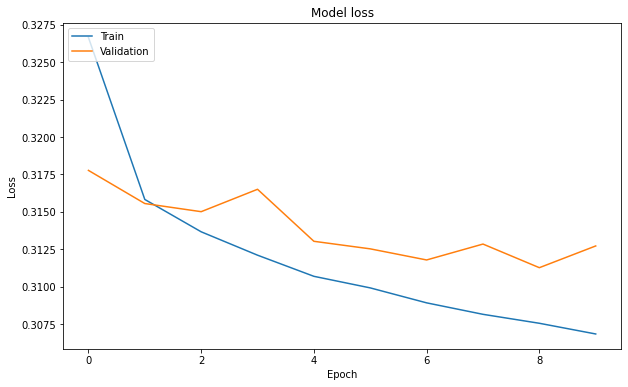

In [6]:
print_or_plot_metric("loss", "Loss", "Model loss")

## Classification Report

In [7]:
if 'classification_report' in data.keys() and data['classification_report']:
    print(data['classification_report'])

                            precision    recall  f1-score   support

                No Finding       0.09      0.02      0.04      4485
Enlarged Cardiomediastinum       0.00      0.00      0.00      2139
              Cardiomegaly       0.13      0.02      0.03      5377
              Lung Opacity       0.47      0.55      0.51     20770
               Lung Lesion       0.00      0.00      0.00      1769
                     Edema       0.23      0.20      0.21     10181
             Consolidation       0.00      0.00      0.00      2985
                 Pneumonia       0.00      0.00      0.00      1186
               Atelectasis       0.00      0.00      0.00      6456
              Pneumothorax       0.09      0.01      0.01      3711
          Pleural Effusion       0.38      0.43      0.40     16653
             Pleural Other       0.00      0.00      0.00       738
                  Fracture       0.00      0.00      0.00      1834
           Support Devices       0.52      0.52

## Test Scores

In [8]:
if 'test' in data.keys() and data['test']:
    for score_name, score in data["test"].items():
        print('Test {}: '.format(score_name), score)



Test loss:  0.312576025724411
Test AUC:  0.7191928029060364
Test Precision:  0.6336762309074402
Test Recall:  0.4824714958667755
Test F2Score:  0.5066503882408142
Test BinaryAccuracy:  0.868972659111023


## Benchmark Details

In [9]:
pp = pprint.PrettyPrinter(indent=4)
if "benchmark" in data.keys():
    pp.pprint(data["benchmark"])

{   'batch_size': 128,
    'dataset_folder': 'data/chexpert/full',
    'dataset_name': 'chexpert_full',
    'dim': [256, 256],
    'drop_last': True,
    'epochs': 10,
    'label_columns': [   'No Finding',
                         'Enlarged Cardiomediastinum',
                         'Cardiomegaly',
                         'Lung Opacity',
                         'Lung Lesion',
                         'Edema',
                         'Consolidation',
                         'Pneumonia',
                         'Atelectasis',
                         'Pneumothorax',
                         'Pleural Effusion',
                         'Pleural Other',
                         'Fracture',
                         'Support Devices'],
    'loss': 'binary_crossentropy',
    'metrics': ['AUC', 'Precision', 'Recall', 'F2Score', 'BinaryAccuracy'],
    'models_dir': 'models',
    'n_channels': 3,
    'nan_replacement': 0,
    'optimizer': 'Adam',
    'path_column': 'Path',
    'path_colu